# Samplers

In [1]:
import sys
sys.path.append('../..')
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pandas as pd

In [2]:
from dataset import NS
ns1 = NS('n', dim=2).truncate(2.0, 0.8, lambda m: np.sum(np.abs(m), axis=1)) + 4
ns2 = 2 * NS('u', dim=2).truncate(1, expr=lambda m: np.sum(m, axis=1)) - (1, 1)
ns3 = NS('n', dim=2).truncate(1.5, expr=lambda m: np.sum(np.square(m), axis=1)) + (4, 0)
ns4 = ((NS('n', dim=2).truncate(2.5, expr=lambda m: np.sum(np.square(m), axis=1)) * 4)
       .apply(lambda m: m.astype(np.int)) / 4 + (0, 3))
ns = 0.4 & ns1 | 0.2 & ns2 | 0.39 & ns3 | 0.01 & ns4

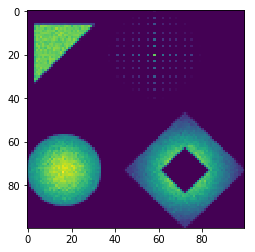

In [3]:
h = np.histogramdd(ns.sample(int(1e6)), bins=100, normed=True)
plt.imshow(h[0])

## Intro

## Building `Samplers`

### 1. Numpy, scipy, tf - `Samplers`

In [4]:
from dataset import NS
ns = NS('n', dim=2)

In [5]:
smp = ns.sample(size=200)

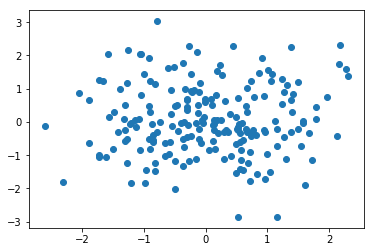

In [6]:
plt.scatter(*np.transpose(smp))

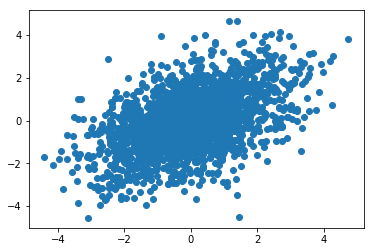

In [7]:
from dataset import SS
ss = SS('mvn', mean=[0, 0], cov=[[2, 1], [1, 2]])
smp = ss.sample(2000)
plt.scatter(*np.transpose(smp))

### 2. `HistoSampler` as an estimate of a distribution generating a cloud of points

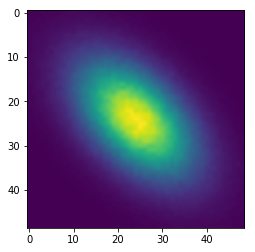

In [8]:
from dataset import HS
hs = HS(edges=2 * [np.linspace(-4, 4)])
hs.update(ss.sample(1000000))
plt.imshow(hs.bins, interpolation='bilinear')

### 3. Algebra of `Samplers`; operations on `Samplers`

* artithmetic operations (`+`, `*`, `-`,...)

In [9]:
# blur using "+"
u = NS('u', dim=2)
noise = NS('n', dim=2)
blurred = u + noise * 0.2 # decrease the magnitude of the noise
both = blurred | u + (2, 2)

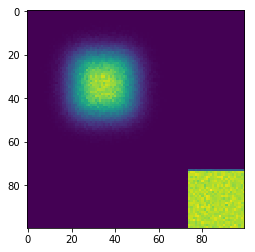

In [10]:
plt.imshow(np.histogramdd(both.sample(1000000), bins=100)[0])

* "Normal" sampling in integers

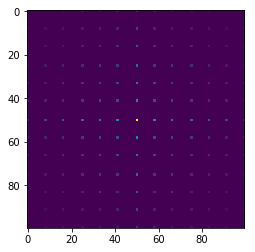

In [11]:
n = (4 * NS('n', dim=2)).apply(lambda m: m.astype(np.int)).truncate([6, 6], [-6, -6])
plt.imshow(np.histogramdd(n.sample(1000000), bins=100)[0])

* truncation

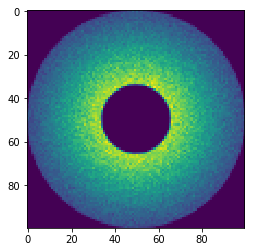

In [12]:
n = NS('n', dim=2).truncate(3, 0.3, expr=lambda m: np.sum(m**2, axis=1))
plt.imshow(np.histogramdd(n.sample(1000000), bins=100)[0])

* alltogether

In [13]:
ns1 = NS('n', dim=2).truncate(2.0, 0.8, lambda m: np.sum(np.abs(m), axis=1)) + 4
ns2 = 2 * NS('u', dim=2).truncate(1, expr=lambda m: np.sum(m, axis=1)) - (1, 1)
ns3 = NS('n', dim=2).truncate(1.5, expr=lambda m: np.sum(np.square(m), axis=1)) + (4, 0)
ns4 = ((NS('n', dim=2).truncate(2.5, expr=lambda m: np.sum(np.square(m), axis=1)) * 4)
       .apply(lambda m: m.astype(np.int)) / 4 + (0, 3))
ns = 0.4 & ns1 | 0.2 & ns2 | 0.39 & ns3 | 0.01 & ns4

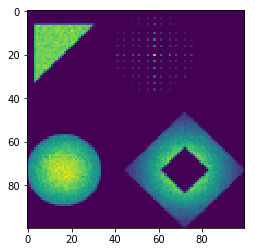

In [14]:
plt.imshow(np.histogramdd(ns.sample(int(1e6)), bins=100, normed=True)[0])